<a href="https://colab.research.google.com/github/joewignell/portfolio/blob/main/Copy_of_Copy_of_logistic_regression_on_heart_failure_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>Logistic Regression to predict death in heart failure patients</center></h1>

Objectives: The objective of this exercise is to use a Logistic Regression machine learning algorithm to define the likelhood of survival of a heart failure patient.  The dataset used for the analysis can be found here: https://www.kaggle.com/andrewmvd/heart-failure-clinical-data. This dataset provides a comprehensive snapshot of the factors that require consideration when trying to predict the outcome of heart failure.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import itertools
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import statistics
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Methods: The necessary datasets were imported for analysis. The death even data were separated from the rest of the data allowing the death event column to be used for predictions and testing of the proposed model. The time column was also removed, as it refers to the time from the last follow up until death and is therefore not a predictor. The first 5 rows of the whole dataset were printed out so that the different parameters avaiaible can be easily reviewed.

In [ ]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
died = df['DEATH_EVENT']
all_features = df.drop(['DEATH_EVENT', 'time'], axis=1)
df.head()
numeric_columns = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']

Next, the model was trained on on every column of the dataset.  The data was split 80/20 into training and testing sets respectively, with all data scaled so the model doesnt over emphasise one factor, for example the platelets column, which has very large numbers compared to the rest. The model was then trained and tested, with the desired outcome being a score as close to 1 as possible, where a score of 1 which indicates the model was entirely predictave.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(all_features, died, test_size=0.2, random_state=10)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
model = LogisticRegression()
model.fit(x_train, y_train)
all_score = model.score(x_test, y_test)

print(all_score)

0.6666666666666666


Results test 1: The model was found to be 66.67% accurate, which was not much of an improvement over guessing! Further optimisation is required. To facilitate this, a graph was prepared visualising the coefficients of each variable (see below).  This will demonstrate how much each variable is influencing the model allowing their importance to be determined.

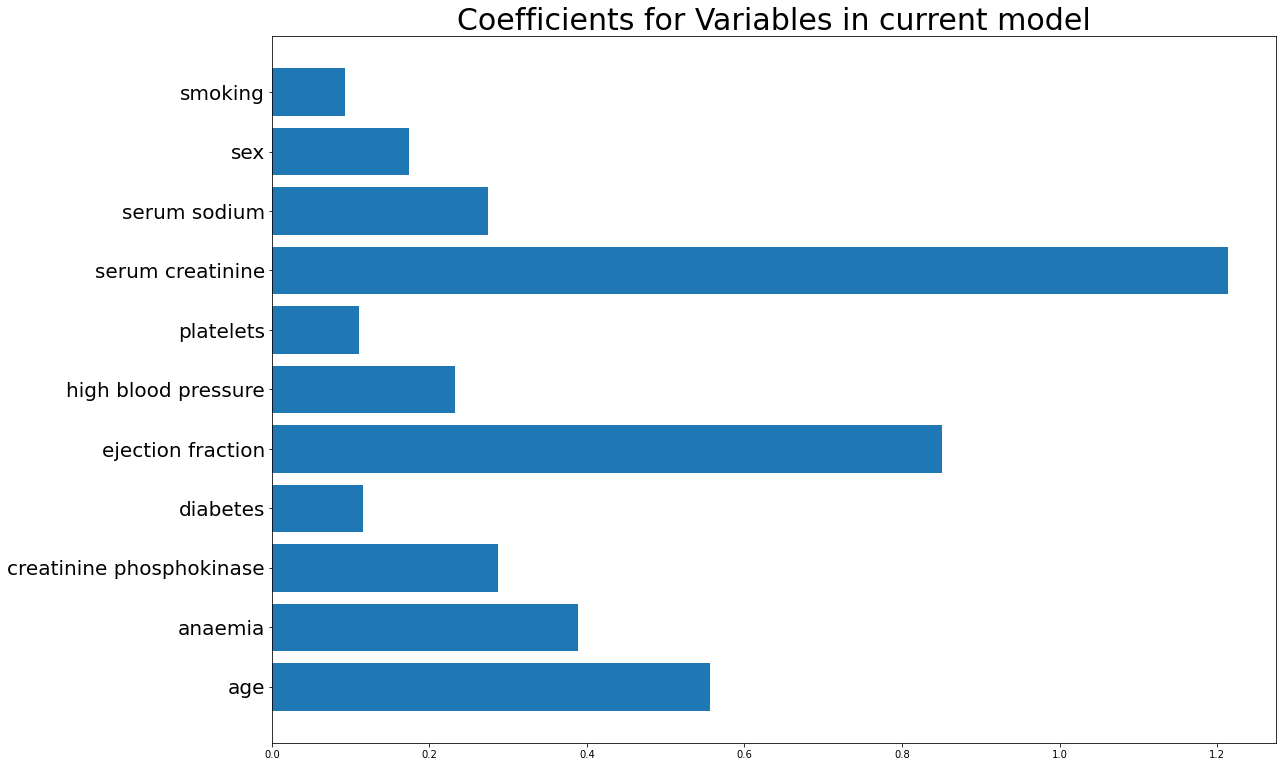

In [ ]:
coefs = model.coef_
coefs = coefs[0]
coefsabs = abs(coefs)
labels = all_features.columns.values
labelsspace = [i.replace('_', ' ') for i in labels]
plt.figure(figsize=(18, 13))
ax = plt.subplot()
plt.barh(range(len(coefsabs)), coefsabs)
ax.set_yticks(range(len(coefs)))
ax.set_yticklabels(labelsspace, fontsize=20)
plt.title('Coefficients for Variables in current model', fontsize=30)
plt.show()

Following review of the graph, variables which were demonstrated as having very little effect on outcome were removed to investigate whether this improved the accuaracy of the proposed model. Once removed, the model was re trained and tested, with print outs collected for this new model and the old one with every variable included. The new model gave a result of 71.66%, a slight improvement over the original score.

In [ ]:
new_features = all_features.drop(['platelets', 'smoking', 'diabetes'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(new_features, died, test_size=0.2, random_state=10)
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
model.fit(x_train, y_train)
print('new model: ', model.score(x_test, y_test))
print('all features: ', all_score)

new model:  0.7166666666666667
all features:  0.6666666666666666


Discussion: It is clear that removing some variables led to an improvement in the model performance, however how can the proposed model be otimised further?  Below is a block of code which will train and test the model on every single combination of the variables we have.  It runs the train and test over 4000 times so it may take a couple of minutes.  Afterwards it will print out the best score it could get along with the largest and smallest list of variables that will achieve that score.  Often the same score can result from different combinations of variables.

In [ ]:
best_features = []
best_most_features = []
best_score = 0
scores = {}
scoreslist = []
for i in range(1, (len(labels))):
  combos = list(itertools.combinations(labels, i))
  for i in combos:
    brand_new_features = all_features[list(i)]
    x_train, x_test, y_train, y_test = train_test_split(brand_new_features, died, test_size=0.2, random_state=10)
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)
    model.fit(x_train, y_train)
    score = model.score(x_test, y_test)
    scores[score] = list(i)
    scoreslist.append(score)
    if score > best_score:
        best_score = score
        best_features = list(i)
    if score == best_score:
        best_most_features = list(i)
        
print('Best Score =', best_score)
print('Shortest List of Features =', best_features)
print('Longest List of Features =', best_most_features)

Best Score = 0.8
Shortest List of Features = ['age', 'high_blood_pressure']
Longest List of Features = ['age', 'creatinine_phosphokinase', 'high_blood_pressure', 'platelets', 'smoking']


According to my code you can get an 80% accurate prediction for the outcome of a heart failure patient with just their age and whether they have high blood pressure or not.  If we look at the last graph these have lower coefficients than some other variables.  Perhaps working with a larger dataset would gleen more information.  The 2 highest coefficients are serum creatinine and ejection franction.  Maybe I could put them one on one against age and high blood pressure in ranomised tests to see if either is better.  I will run my model on randomised splits of the data 100 times and then print the mean result of each set of variables.

In [ ]:
scores_age = []
scores_serum = []
i = 0

while i < 100:
  age_and_pressure = all_features[['age', 'high_blood_pressure']]
  x_train, x_test, y_train, y_test = train_test_split(age_and_pressure, died, test_size=0.2)
  x_train = scaler.fit_transform(x_train)
  x_test = scaler.transform(x_test)
  model.fit(x_train, y_train)
  scores_age.append(model.score(x_test, y_test))

  serum_and_ejection = all_features[['serum_creatinine', 'ejection_fraction']]
  x_train, x_test, y_train, y_test = train_test_split(serum_and_ejection, died, test_size=0.2)
  x_train = scaler.fit_transform(x_train)
  x_test = scaler.transform(x_test)
  model.fit(x_train, y_train)
  scores_serum.append(model.score(x_test, y_test))
  i += 1

print('Mean score for age and blood pressure: ', statistics.mean(scores_age))
print('Mean score for serum creatinine and ejection fraction: ', statistics.mean(scores_serum))


Mean score for age and blood pressure:  0.7083333333333334
Mean score for serum creatinine and ejection fraction:  0.7456666666666667


As this is randomised you will be seeing different numbers from me now but after a few runs it appears that serum creatinine and ejection fraction is about 5% more accurate, with a score of 74.73% versus 70.03% for age and blood pressure alone. It seems the 80% we got before was a complete outlier, which is why data anaylsis shoud be repeated multiple times.  With a more powerful computer and more time I could run the model 100 times on every combination of variables using the code I wrote before and then compare averages of all those results but for now it appears serum creatinine and ejection fraction are reasonable predictors of the outcome of heart failure.

In [ ]:
best_features = []
best_most_features = []
best_score = 0
scores = {}

for i in range(1, (len(labels))):
  combos = list(itertools.combinations(labels, i))
  for i in combos:
    brand_new_features = all_features[list(i)]
    scoreslist = []
    j=0
    while j < 10:
      x_train, x_test, y_train, y_test = train_test_split(brand_new_features, died, test_size=0.2)
      x_train = scaler.fit_transform(x_train)
      x_test = scaler.transform(x_test)
      model.fit(x_train, y_train)
      score = model.score(x_test, y_test)
      scoreslist.append(score)
      j += 1
    mean_score = statistics.mean(scoreslist) 
    if mean_score > best_score:
      best_score = mean_score
      best_features = list(i)
    if mean_score == best_score:
      best_most_features = list(i)

print('Best Score =', best_score)
print('Shortest List of Features =', best_features)
print('Longest List of Features =', best_most_features)

Best Score = 0.8016666666666666
Shortest List of Features = ['age', 'ejection_fraction', 'high_blood_pressure', 'serum_creatinine']
Longest List of Features = ['age', 'anaemia', 'ejection_fraction', 'serum_creatinine', 'sex', 'smoking']


So after running that code on a google collab gpu accelerated notebook I can confirm that using age, ejection_fraction, high_blood_pressure and serum_creatinine to train the model you can get an acuracy of 80%.  I believe a larger study with more data would be needed before you could implement anything like this and I would reccommend adjusting the classification threshold in a clinical seitting in order to create more false positives.  In this case the cost of a false negative, is in my opinion, worth skewing the model to be less accurate.